# WSN-DS dataset

# libraries import

In [120]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import normalize, minmax_scale
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# DATA IMPORTATION

In [121]:
#importing the dataset
df=pd.read_csv('data/WSN-DS.csv')
df.head(10)

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal
5,101005,50,0,101010,31.91198,0,4,1,0,0,1,18,41,0,0,0.00000,3,0.06717,Normal
6,101006,50,0,101044,24.34167,0,4,1,0,0,1,5,38,0,0,0.00000,4,0.06214,Normal
7,101007,50,0,101010,26.75033,0,4,1,0,0,1,21,41,0,0,0.00000,3,0.06662,Normal
8,101008,50,0,101044,63.66485,0,4,1,0,0,1,17,38,0,0,0.00000,4,0.06649,Normal
9,101009,50,0,101000,32.90217,0,4,1,0,0,1,12,48,0,0,0.00000,1,0.07903,Normal


In [122]:
df.dtypes

 id                   int64
 Time                 int64
 Is_CH                int64
 who CH               int64
 Dist_To_CH         float64
 ADV_S                int64
 ADV_R                int64
 JOIN_S               int64
 JOIN_R               int64
 SCH_S                int64
 SCH_R                int64
Rank                  int64
 DATA_S               int64
 DATA_R               int64
 Data_Sent_To_BS      int64
 dist_CH_To_BS      float64
 send_code            int64
Expaned Energy      float64
Attack type          object
dtype: object

In [123]:
df.shape

(374661, 19)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

# Data cleaning

# Preprocessing
classification binaire(dos=1,>dos=0)

In [125]:
if df['Attack type'].dtypes == 'object' :
 unique_cat = df['Attack type'].unique()   
 print(unique_cat)

['Normal' 'Flooding' 'TDMA' 'Grayhole' 'Blackhole']


In [126]:
# replace the label dict with 0 or 1
df['Attack type'].replace({ 'Normal' : 0, 'Flooding' : 1 ,'Blackhole': 1, 'Grayhole': 1, 'TDMA': 0 
                        },inplace = True)


# view the updated dataset
df.head(10)

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,0
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,0
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,0
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,0
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,0
5,101005,50,0,101010,31.91198,0,4,1,0,0,1,18,41,0,0,0.00000,3,0.06717,0
6,101006,50,0,101044,24.34167,0,4,1,0,0,1,5,38,0,0,0.00000,4,0.06214,0
7,101007,50,0,101010,26.75033,0,4,1,0,0,1,21,41,0,0,0.00000,3,0.06662,0
8,101008,50,0,101044,63.66485,0,4,1,0,0,1,17,38,0,0,0.00000,4,0.06649,0
9,101009,50,0,101000,32.90217,0,4,1,0,0,1,12,48,0,0,0.00000,1,0.07903,0


In [93]:
df.isna().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Attack type         0
dtype: int64

In [127]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
 
df=pd.DataFrame(scaler.fit_transform(df),
            columns=df.columns, index=df.index) 



df.head(20)

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,0.000000e+00,0.0,1.0,0.000000,0.000000,0.010309,0.000000,0.0,0.201613,0.010101,0.0,0.000000,0.000000,0.802139,0.199170,0.644194,0.000000,0.054761,0.0
1,3.029297e-07,0.0,0.0,0.000013,0.351528,0.000000,0.034188,1.0,0.000000,0.000000,1.0,0.020202,0.157676,0.000000,0.000000,0.000000,0.266667,0.001543,0.0
2,6.058594e-07,0.0,0.0,0.000003,0.219132,0.000000,0.034188,1.0,0.000000,0.000000,1.0,0.191919,0.170124,0.000000,0.000000,0.000000,0.200000,0.001530,0.0
3,9.087891e-07,0.0,0.0,0.000013,0.302660,0.000000,0.034188,1.0,0.000000,0.000000,1.0,0.161616,0.157676,0.000000,0.000000,0.000000,0.266667,0.001480,0.0
4,1.211719e-06,0.0,0.0,0.000003,0.022557,0.000000,0.034188,1.0,0.000000,0.000000,1.0,0.252525,0.170124,0.000000,0.000000,0.000000,0.200000,0.001449,0.0
5,1.514648e-06,0.0,0.0,0.000003,0.148930,0.000000,0.034188,1.0,0.000000,0.000000,1.0,0.181818,0.170124,0.000000,0.000000,0.000000,0.200000,0.001490,0.0
6,1.817578e-06,0.0,0.0,0.000013,0.113600,0.000000,0.034188,1.0,0.000000,0.000000,1.0,0.050505,0.157676,0.000000,0.000000,0.000000,0.266667,0.001378,0.0
7,2.120508e-06,0.0,0.0,0.000003,0.124841,0.000000,0.034188,1.0,0.000000,0.000000,1.0,0.212121,0.170124,0.000000,0.000000,0.000000,0.200000,0.001477,0.0
8,2.423438e-06,0.0,0.0,0.000013,0.297118,0.000000,0.034188,1.0,0.000000,0.000000,1.0,0.171717,0.157676,0.000000,0.000000,0.000000,0.266667,0.001474,0.0
9,2.726367e-06,0.0,0.0,0.000000,0.153551,0.000000,0.034188,1.0,0.000000,0.000000,1.0,0.121212,0.199170,0.000000,0.000000,0.000000,0.066667,0.001753,0.0


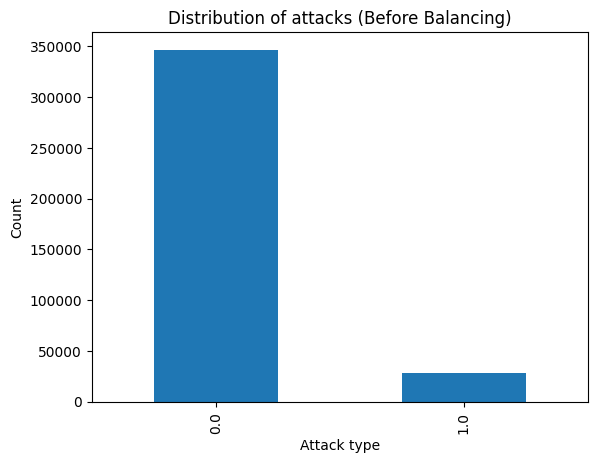

In [128]:
#before balancing the label
import matplotlib.pyplot as plt

# plot the distribution of the 'label' column before balancing
df['Attack type'].value_counts().plot(kind='bar')
plt.xlabel('Attack type')
plt.ylabel('Count')
plt.title('Distribution of attacks (Before Balancing)')
plt.show()

In [129]:
x = df.iloc[:,0:18]
y = df.iloc[:,-1]

In [130]:
df['Attack type'].value_counts()

0.0    346704
1.0     27957
Name: Attack type, dtype: int64

In [136]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, train_size = 0.7,
                                                    random_state = 88, shuffle= True,
                                                    stratify=y)

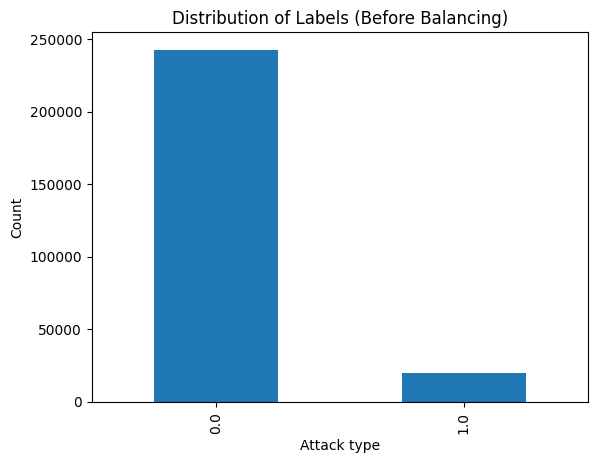

In [137]:
# plot the distribution of the 'label' column before balancing
y_train.value_counts().plot(kind='bar')
plt.xlabel('Attack type')
plt.ylabel('Count')
plt.title('Distribution of Labels (Before Balancing)')
plt.show()

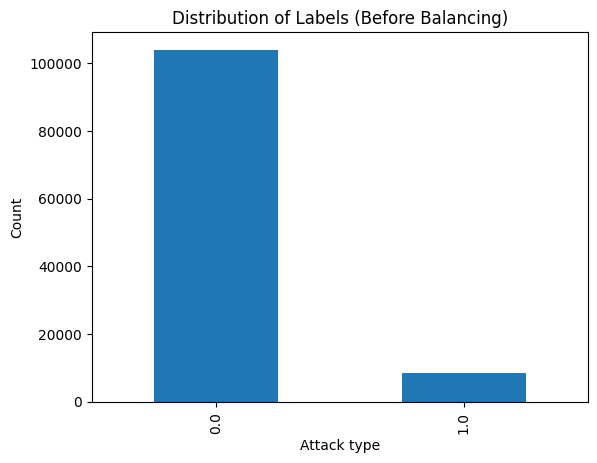

In [138]:
# plot the distribution of the 'label' column before balancing
y_test.value_counts().plot(kind='bar')
plt.xlabel('Attack type')
plt.ylabel('Count')
plt.title('Distribution of Labels (Before Balancing)')
plt.show()

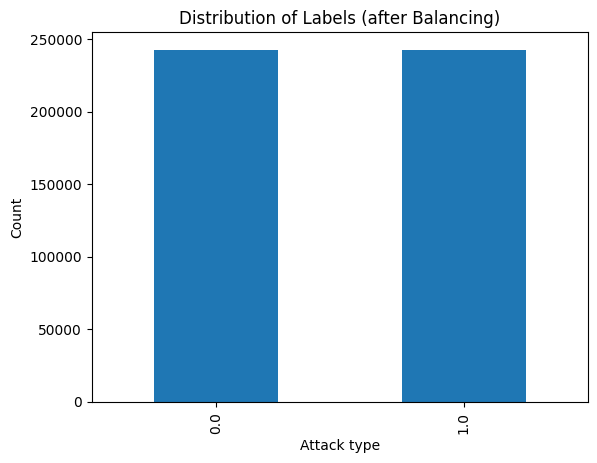

In [139]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=88)
x_train, y_train = over_sampler.fit_resample(x_train, y_train)

# plot the distribution of the 'label' column after balancing
y_train.value_counts().plot(kind='bar')
plt.xlabel('Attack type')
plt.ylabel('Count')
plt.title('Distribution of Labels (after Balancing)')
plt.show()

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

predicted = dt.predict(x_test)


accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)


Accuracy: 0.9978825434389985 

                Predicted DOS  Predicted Not DOS
Actual DOS             103913                 99
Actual Not DOS            139               8248 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104012
         1.0       0.99      0.98      0.99      8387

    accuracy                           1.00    112399
   macro avg       0.99      0.99      0.99    112399
weighted avg       1.00      1.00      1.00    112399



Matrice de Corrélation :


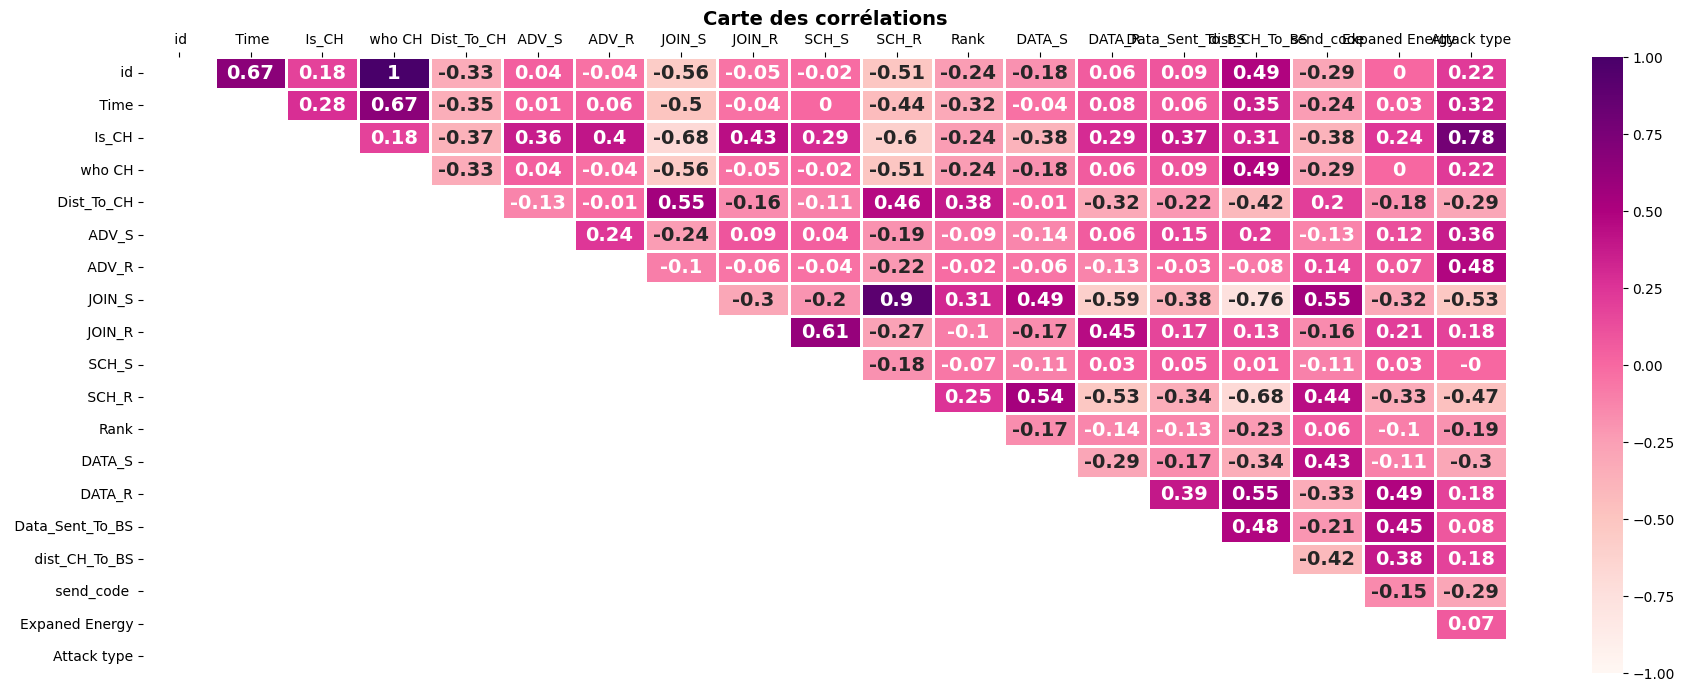

In [103]:

# La matrice de corrélation
matrice_corr = df.corr().round(2)
print("Matrice de Corrélation :")
matrice_corr

plt.figure(figsize=(22,8))
annot_kws = {'fontsize': 14, 'fontweight': 'bold'}  
mask = np.tril(np.ones((matrice_corr.shape[0], matrice_corr.shape[1]), dtype=bool))
ax=sns.heatmap(matrice_corr, mask=mask,  cmap='RdPu',linewidths=2, annot=True,annot_kws=annot_kws,  vmin=-1, vmax=1)
ax.set_title('Carte des corrélations', fontsize = 14, fontweight='bold')
ax.xaxis.tick_top()
plt.show()

In [107]:
#KNN
# Import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Choose the value of K
k = 5

# Train the model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9969572818384423


In [108]:
#RANDOM FOREST
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initialize the Random Forest
n_estimators = 100 # Number of decision trees
max_depth = None # Maximum depth of trees
min_samples_split = 2 # Minimum number of samples required to split a node
min_samples_leaf = 1 # Minimum number of samples required to be at a leaf node
rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# Train the Random Forest
rf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9987989270414904


In [109]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression(max_iter=500)

Lr.fit(x_train,y_train)

predicted = Lr.predict(x_test)

accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.9739767525656253 

                Predicted DOS  Predicted Not DOS
Actual DOS              67396               1946
Actual Not DOS              4               5587 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     69342
         1.0       0.74      1.00      0.85      5591

    accuracy                           0.97     74933
   macro avg       0.87      0.99      0.92     74933
weighted avg       0.98      0.97      0.98     74933



In [110]:
# Load the dataset

from sklearn.feature_selection import SelectFromModel


# Import the required libraries
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest Classifier
sel =SelectFromModel(RandomForestClassifier(n_estimators=100))

# Train the classifier using the training set
sel.fit(x_train, y_train)

# Get the feature importances
sel.get_support()
# Sort the features based on their importances in descending order
selected_fet=x_train.columns[(sel.get_support())]

print('nbr of features selected  ',len(selected_fet))

print(' features selected  ',selected_fet)



# Train a new classifier using only the selected features
rf_new = RandomForestClassifier(n_estimators=100)
rf_new.fit(x_train.loc[:, selected_fet], y_train)

# Test the new classifier using the testing set and evaluate its performance
y_pred = rf_new.predict(x_test.loc[:, selected_fet])
score = rf_new.score(x_test.loc[:, selected_fet], y_test)
print("Accuracy score: ", score)


Conf_Mat = confusion_matrix(y_test,y_pred)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,y_pred)
print("Classification report:\n", report)


nbr of features selected   5
 features selected   Index([' Is_CH', ' ADV_S', ' JOIN_S', 'Rank', ' DATA_S'], dtype='object')
Accuracy score:  0.9586964354823643
                Predicted DOS  Predicted Not DOS
Actual DOS              66247               3095
Actual Not DOS              0               5591 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     69342
         1.0       0.64      1.00      0.78      5591

    accuracy                           0.96     74933
   macro avg       0.82      0.98      0.88     74933
weighted avg       0.97      0.96      0.96     74933



<Axes: >

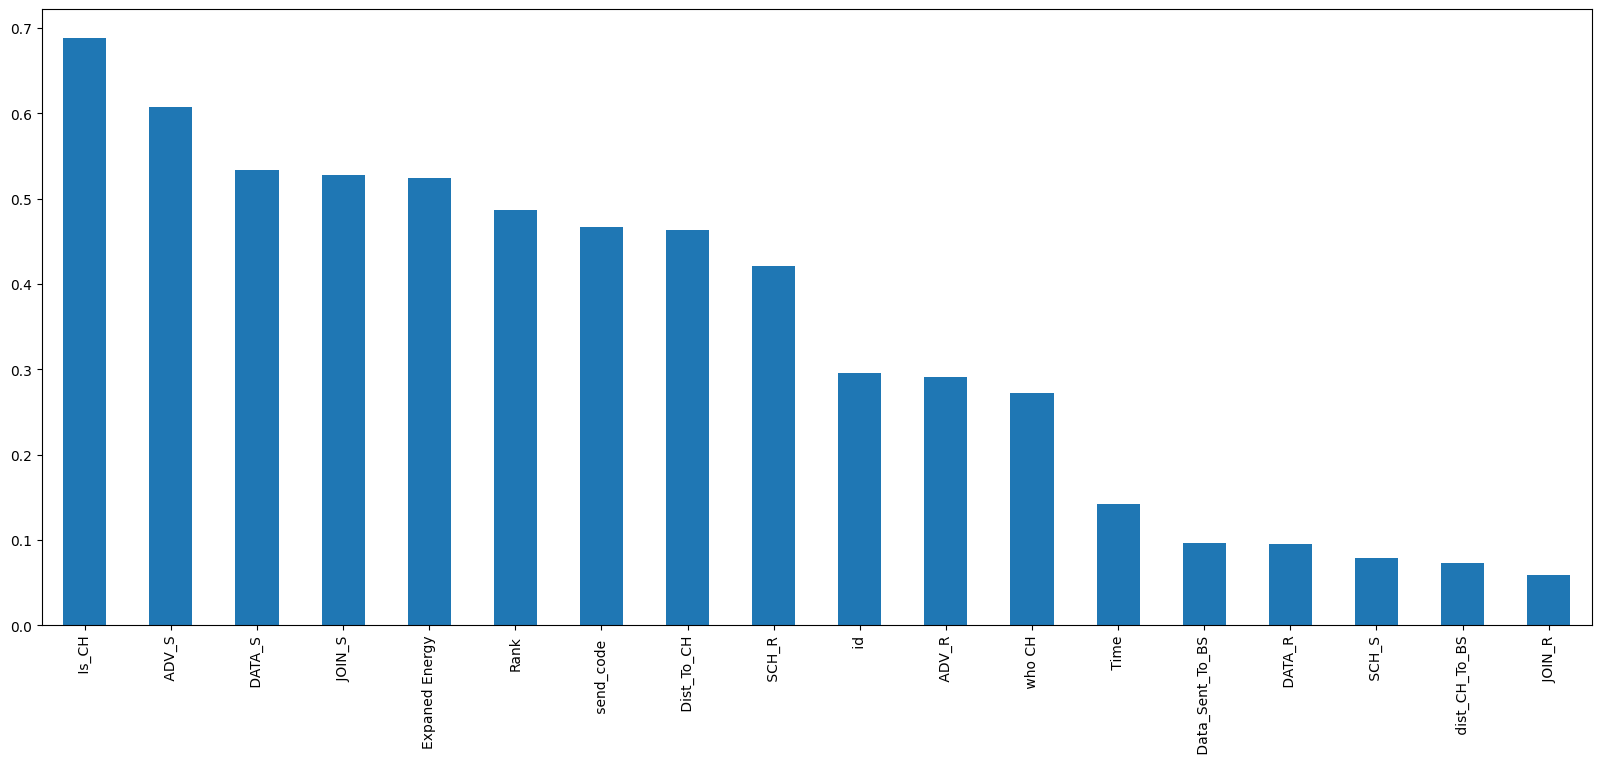

In [111]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [114]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif



# Feature selection using CFS
selector = SelectKBest(mutual_info_classif, k=5)
X_train_new = selector.fit_transform(x_train, y_train)
X_test_new = selector.transform(x_test)

# Get indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Print selected features
selected_features = df.columns[selected_features_indices]
print("Selected features:", selected_features)

Selected features: Index([' Is_CH', ' ADV_S', ' JOIN_S', ' DATA_S', 'Expaned Energy'], dtype='object')


Accuracy: 0.9752445517996077 

                Predicted DOS  Predicted Not DOS
Actual DOS              68025               1317
Actual Not DOS            538               5053 

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     69342
         1.0       0.79      0.90      0.84      5591

    accuracy                           0.98     74933
   macro avg       0.89      0.94      0.92     74933
weighted avg       0.98      0.98      0.98     74933



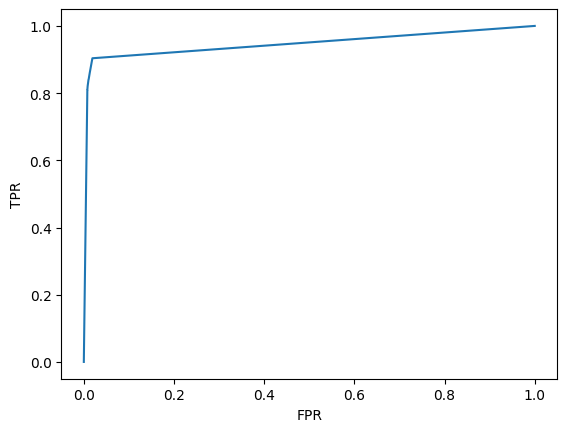

0.946689881900365


In [115]:
dt = DecisionTreeClassifier()

dt.fit(X_train_new, y_train)

predicted = dt.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")


Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_prob = dt.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

Accuracy: 0.9754580758811204 

                Predicted DOS  Predicted Not DOS
Actual DOS              68021               1321
Actual Not DOS            518               5073 

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     69342
         1.0       0.79      0.91      0.85      5591

    accuracy                           0.98     74933
   macro avg       0.89      0.94      0.92     74933
weighted avg       0.98      0.98      0.98     74933



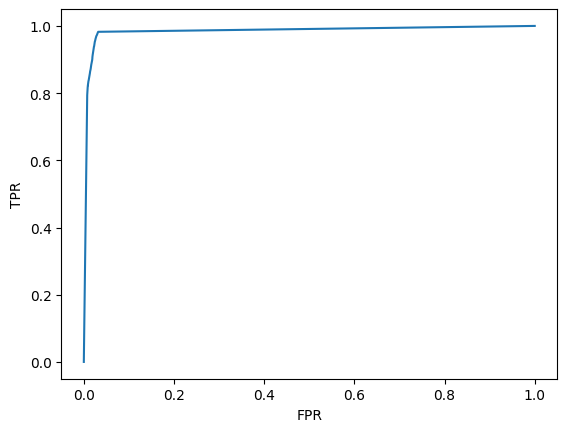

0.9848310583702249


In [116]:
Rf =  RandomForestClassifier(n_estimators =100)
Rf.fit(X_train_new, y_train)



predicted = Rf.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = Rf.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

Accuracy: 0.9587097807374588 

                Predicted DOS  Predicted Not DOS
Actual DOS              66248               3094
Actual Not DOS              0               5591 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     69342
         1.0       0.64      1.00      0.78      5591

    accuracy                           0.96     74933
   macro avg       0.82      0.98      0.88     74933
weighted avg       0.97      0.96      0.96     74933



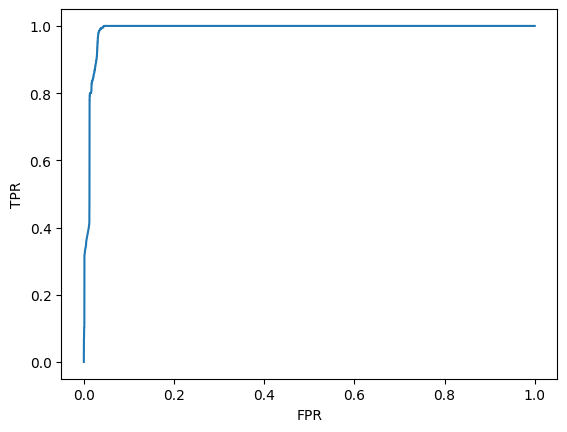

0.9889266473839966


In [117]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression(max_iter=500)

Lr.fit(X_train_new,y_train)

predicted = Lr.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = Lr.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

Accuracy: 0.9977980329093991 

                Predicted DOS  Predicted Not DOS
Actual DOS              69278                 64
Actual Not DOS            101               5490 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     69342
         1.0       0.99      0.98      0.99      5591

    accuracy                           1.00     74933
   macro avg       0.99      0.99      0.99     74933
weighted avg       1.00      1.00      1.00     74933



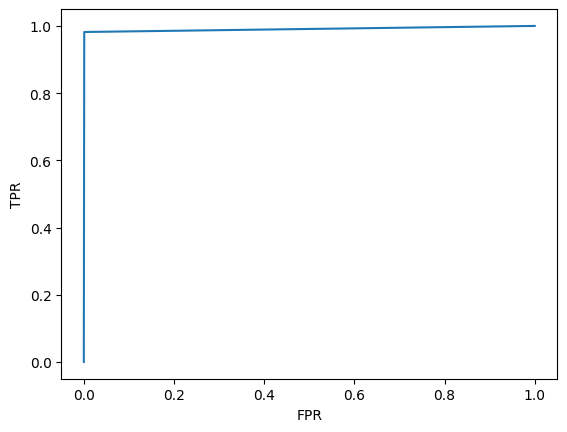

0.9905061457662164


In [118]:
from sklearn.feature_selection import RFE
estimator = DecisionTreeClassifier()
selector = RFE(estimator)

selector = selector.fit(x_train, y_train)


predicted = selector.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = selector.predict_proba(x_test)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)


Accuracy: 0.9882294850066059 

                Predicted DOS  Predicted Not DOS
Actual DOS              68885                457
Actual Not DOS            425               5166 

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     69342
         1.0       0.92      0.92      0.92      5591

    accuracy                           0.99     74933
   macro avg       0.96      0.96      0.96     74933
weighted avg       0.99      0.99      0.99     74933



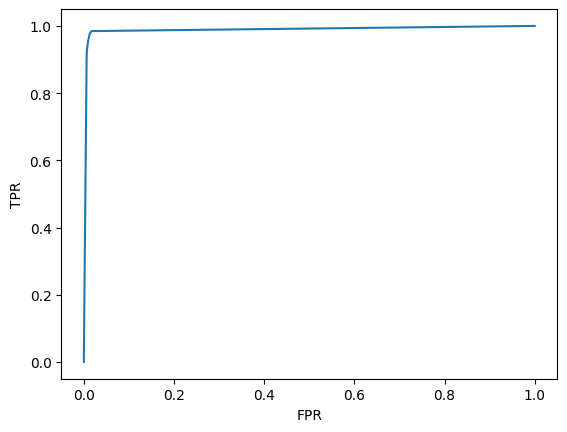

0.9887427251945172


In [119]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier(n_estimators =100)
selector = RFE(estimator)
selector = selector.fit(x_train, y_train)
predicted = selector.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = selector.predict_proba(x_test)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)


In [ ]:
from sklearn.feature_selection import RFE
estimator = LogisticRegression()
selector = RFE(estimator)
selector = selector.fit(x_train, y_train)
predicted = selector.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = selector.predict_proba(x_test)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)
